In [2]:
library(tidyverse)
library(lubridate)
library(forcats)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Lecture 15: Factors

In this lecture we will use the [General Social Survey](https://gss.norc.org) to study various social indicators in the U.S. The book covers an example extract of this dataset called `gss_cat`. However, it is not up to date; in particular it does not include any data from people who were born after the year 2000 (i.e. almost everyone in this room except the instructor). So to make it more relevant, we are going to load a more recent version of the data.

In [3]:
load(url('https://datasets.stats306.org/gss18.RData'))

This command has loaded two tables into your workspace: `gss18.raw` contains the raw data, and `gss18.doc` contains 
information about what each column in `gss18.raw` represents:

In [5]:
gss18.raw %>% print(width = Inf)

# A tibble: 2,348 × 14
     age  race   sex relig relpast sexbirth sexnow yearsusa unhappy  educ income
   <int> <int> <int> <int>   <int>    <int>  <int>    <int>   <int> <int>  <int>
 1    43     1     1    11       5       NA     NA       NA      NA    14     NA
 2    74     1     2     2      NA        1      1       NA       1    10     12
 3    42     1     1     4       3        2      2       NA      NA    16     12
 4    63     1     2     1      NA        1      1       NA       2    16     NA
 5    71     2     1     2      NA        2      2       NA       1    18     NA
 6    67     1     2     2       4       NA     NA       NA      NA    16     NA
 7    59     2     2     1      NA       NA     NA       NA       2    13     10
 8    43     1     1     2      NA        2      2       NA       2    12     12
 9    62     1     2     4       4        1      1       NA      NA     8      5
10    55     1     1     1      NA        2      2       NA       4    12     12
   ph

In [4]:
gss18.doc %>% print

# A tibble: 14 × 5
   id       description                               properties marginals text 
   <chr>    <chr>                                     <list>     <list>    <chr>
 1 age      Age of respondent                         <tibble>   <tibble>  13. …
 2 sex      Respondents sex                           <tibble>   <tibble>  23. …
 3 race     Race of respondent                        <tibble>   <tibble>  24. …
 4 educ     Highest year of school completed          <tibble>   <tibble>  15. …
 5 income   Total family income                       <tibble>   <tibble>  37. …
 6 partyid  Political party affiliation               <tibble>   <tibble>  56. …
 7 relig    R's religious preference                  <tibble>   <tibble>  104.…
 8 tvhours  Hours per day watching TV                 <tibble>   <tibble>  242.…
 9 phone    Does R have telephone                     <tibble>   <tibble>  243.…
10 unhappy  How often R was unhappy or depressed in … <tibble>   <tibble>  None 
11 relpas

## Factors
Except for `age` and `tvhours`, each of the columns in `gss18.raw` is a categorical random variable. (Recall that a random variable is *categorical* if it takes on one of a (small) number of discrete values.) In R we represent categorical variables using *factors*.

To learn the basics, we'll start with a simple example, before returning to the `gss` data:

In [7]:
birth_months = c("Jan", "Feb", "Sep", "Sep", "Dec", "Jan", "Jul", "Aug")  # categorical variable

The *possible* values of a categorical variable are called the *levels*. The levels of `birth_months` are `Jan`, `Feb`, ..., `Dec`. The *actual* values of `birth_months` are just called the values.

*Factors* are the traditional way to represent categorical data in R. To create a factor, we must specify the levels and the values:

In [8]:
month.abb

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [11]:
birth_months_fac = factor(birth_months, levels=month.abb) %>% print

[1] Jan Feb Sep Sep Dec Jan Jul Aug
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


**What if levels is not provided?**

If you don't specify the levels, R will infer them based on all the observed values of the variable:

In [ ]:
factor(birth_months) %>% str

 Factor w/ 6 levels "Aug","Dec","Feb",..: 4 3 6 6 2 4 5 1


**Best practice**

It's best to be explicit about the factor levels. This way, if you there are typos or data entry errors, you will catch them more easily:

In [7]:
bad = c("Jan", "Feb", "Sep", "Ser", "Dec", "Jan", "Jul", "Aug")
#                               ^ note typo
# factor(bad)
factor(bad, levels=month.abb)

[1] Jan  Feb  Sep  <NA> Dec  Jan  Jul  Aug 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

### Order
One advantage of factors is that they can be ordered. This enables them to sort and plot in the way you would expect. Compare:

In [69]:
sort(birth_months)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Sep"

In [70]:
sort(birth_months_fac)

[1] Jan Jan Feb Jul Aug Sep Sep Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you specify the factor levels using the `levels=` option, then that will specify the default order. If you do *not* specify the levels, then they will be sorted alphabetically by default.

**levels**

You can just get the levels of a factor using the levels function

In [71]:
levels(birth_months_fac)

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [72]:
levels(factor(birth_months))

[1] "Aug" "Dec" "Feb" "Jan" "Jul" "Sep"

Now, back to `gss18`. Let's focus on the [`race`](https://gssdataexplorer.norc.org/variables/82/vshow) column:

In [ ]:
gss18.raw %>% select(race) %>% print

# A tibble: 2,348 × 1
    race
   <int>
 1     1
 2     1
 3     1
 4     1
 5     2
 6     1
 7     2
 8     1
 9     1
10     1
# … with 2,338 more rows


These data have been encoded for us into numbers. To get the coding scheme, we can consult the accompanying `gss18.doc` table:

In [84]:
gss18.doc %>% head(3)

id,description,properties,marginals,text
<chr>,<chr>,<list>,<list>,<chr>
age,Age of respondent,"Data type , Missing-data codes, Record/columns , numeric , 0,98,99 , 1/233-234 , AGE , AGE , AGE","Total Cases: , 64,814 (Range of valid codes: 18-89), AGE",13. Respondent's age
sex,Respondents sex,"Data type , Missing-data code, Record/column , numeric , 0 , 1/297 , SEX , SEX , SEX","44.1 , 55.9 , 100 , 28,614, 36,200, 64,814, 1 , 2 , NA , MALE , FEMALE, Total , SEX , SEX , SEX",23. Code respondent's sex
race,Race of respondent,"Data type , Missing-data code, Record/column , numeric , 0 , 1/298 , RACE , RACE , RACE","80.3 , 14.2 , 5.5 , 100 , 52,033, 9,187 , 3,594 , 64,814, 1 , 2 , 3 , NA , WHITE , BLACK , OTHER , Total , RACE , RACE , RACE , RACE",24. What race do you consider yourself?


In [85]:
gss18.doc %>% filter(id == "race") %>% 
  select(marginals)

marginals
<list>
"80.3 , 14.2 , 5.5 , 100 , 52,033, 9,187 , 3,594 , 64,814, 1 , 2 , 3 , NA , WHITE , BLACK , OTHER , Total , RACE , RACE , RACE , RACE"


In [91]:
gss18.doc %>% filter(id == "race") %>% 
  select(marginals) %>% c

percent,n,value,label,id
<dbl>,<chr>,<chr>,<chr>,<chr>
80.3,"52,033",1,WHITE,RACE
14.2,"9,187",2,BLACK,RACE
5.5,"3,594",3,OTHER,RACE
100.0,"64,814",NA,Total,RACE


Let's convert race in `gss18.raw` from an integer into a factor:

In [ ]:
# convert race to factor

# A tibble: 2,348 × 11
     age race    sex relig relpast sexbirth sexnow yearsusa unhappy  educ income
   <int> <fct> <int> <int>   <int>    <int>  <int>    <int>   <int> <int>  <int>
 1    43 white     1    11       5       NA     NA       NA      NA    14     NA
 2    74 white     2     2      NA        1      1       NA       1    10     12
 3    42 white     1     4       3        2      2       NA      NA    16     12
 4    63 white     2     1      NA        1      1       NA       2    16     NA
 5    71 black     1     2      NA        2      2       NA       1    18     NA
 6    67 white     2     2       4       NA     NA       NA      NA    16     NA
 7    59 black     2     1      NA       NA     NA       NA       2    13     10
 8    43 white     1     2      NA        2      2       NA       2    12     12
 9    62 white     2     4       4        1      1       NA      NA     8      5
10    55 white     1     1      NA        2      2       NA       4    12     12
# … w

Notice that the order mattered -- R matched `white` with `1`, `black` with `2`, etc. If we had 
specified `labels=c("black", "white", "other")` it would have given us an incorrect factor.

## 🤔 Quiz

What percent of people in `gss18` identified as 'black' when asked about their race?

<ol style="list-style-type: upper-alpha;">
    <li>0-10%</li>
    <li>10-20%</li>
    <li>20-30%</li>
    <li>More than 30%</li>
</ol>


In [98]:
# black

Now let's do this for all the other categorical variables in `gss18.raw`...

Just kidding! This work is already done for you, and stored it in the table `gss18`:

In [92]:
print(gss18)

# A tibble: 2,348 × 14
     age race  sex   relig relpast sexbirth sexnow yearsusa unhappy educ  income
   <int> <fct> <fct> <fct> <fct>   <fct>    <fct>  <fct>    <fct>   <fct> <fct> 
 1    43 white male  chri… strong… NA       NA     NA       NA      14    NA    
 2    74 white fema… cath… NA      female   women  NA       never   10    $2500…
 3    42 white male  none  neithe… male     man    NA       NA      16    $2500…
 4    63 white fema… prot… NA      female   women  NA       rarely  16    NA    
 5    71 black male  cath… NA      male     man    NA       never   18    NA    
 6    67 white fema… cath… disagr… NA       NA     NA       NA      16    NA    
 7    59 black fema… prot… NA      NA       NA     NA       rarely  13    $1500…
 8    43 white male  cath… NA      male     man    NA       rarely  12    $2500…
 9    62 white fema… none  disagr… female   women  NA       NA      8     $5000…
10    55 white male  prot… NA      male     man    NA       often   12    $2500…
# ℹ 2

**finding mean**

I tried to find the mean on a income column and is this correct?

In [59]:
## finding mean
mean(as.numeric(gss18$income), na.rm = T)

[1] 10.94957

What exactly happened here? The underlying numeric representation of the factor levels is returned. Each level in the factor is assigned a numeric value based on its position in the levels attribute of the factor

In [58]:
gss18 %>% count(income) %>% mutate(line = row_number(), line_total = n * line) %>% 
        filter(!is.na(income)) %>% summarize(mean = sum(line_total)/sum(n))

mean
<dbl>
10.94957


## Exercise

Apply the mean function to all numeric variables using `sapply`

In [103]:
gss18 %>% select(where(is.numeric)) %>% print

# A tibble: 2,348 × 2
     age tvhours
   <int>   <int>
 1    43       3
 2    74      NA
 3    42       1
 4    63       1
 5    71      NA
 6    67      10
 7    59      NA
 8    43      NA
 9    62       4
10    55       2
# ℹ 2,338 more rows


### The `forcats` package
`tidyverse` contains a package that has some tools for working with factors. Sometimes it is not automatically loaded by the `tidyverse` metapackage, in which case you must load it manually:

In [ ]:
library(forcats) 

`forcats` commands are prefixed by `fct_` (compare `stringr`).

## Generations
Here are the ages of everybody in the dataset:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


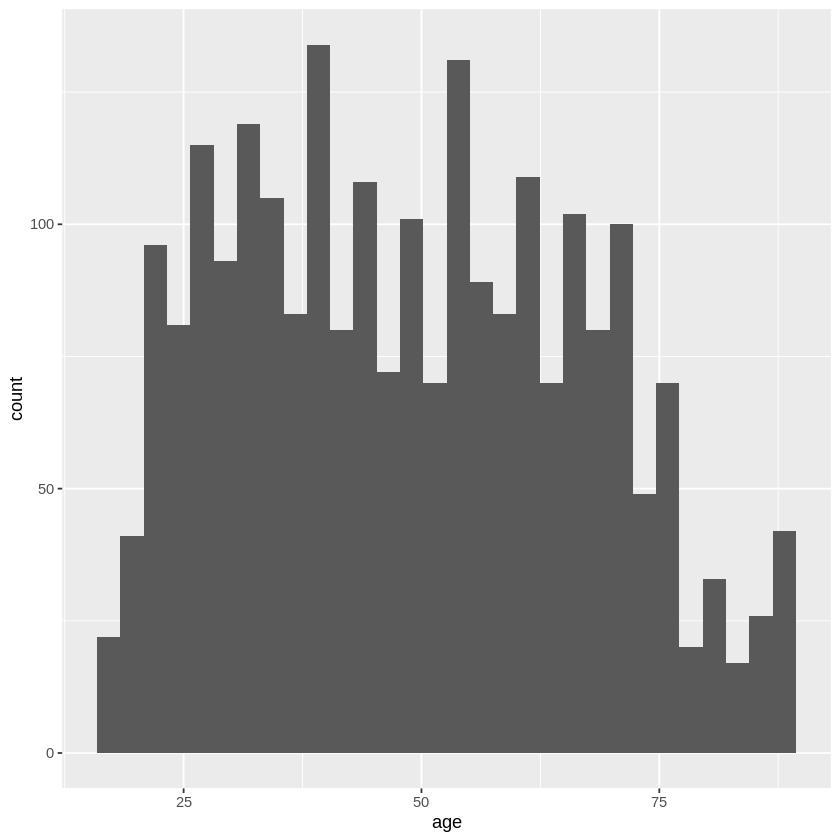

In [105]:
ggplot(gss18) + geom_histogram(aes(x = age)) 

## 🤔 Quiz

In what year was the oldest person in this dataset born?

<ol style="list-style-type: upper-alpha;">
    <li>1910-1919</li>
    <li>1920-1929</li>
    <li>1930-1939</li>
    <li>1940-1949</li>
</ol>


In [115]:
# oldest person was born in which year?


Let's define the following generations
- [Silent generation](https://en.wikipedia.org/wiki/Silent_Generation): 1929&mdash;1945
- [Baby boomers](https://en.wikipedia.org/wiki/Baby_boomers): 1946&mdash;1964
- [Gen X](https://en.wikipedia.org/wiki/Generation_X): 1964&mdash;1981
- [Gen Y/Millennial](https://en.wikipedia.org/wiki/Millennials): 1982&mdash;1996
- [Gen Z](https://en.wikipedia.org/wiki/Generation_Z): 1997&mdash;20teens

In [130]:
# create a generations column in gss18
gss18 <- mutate(gss18, birth_year = 2018 - age,
                generation = cut(birth_year, breaks = c(1929, 1946, 1964, 1982, 1997, 2020),
                                 labels=c('silent', 'boomer', 'x', 'millennial', 'z')))

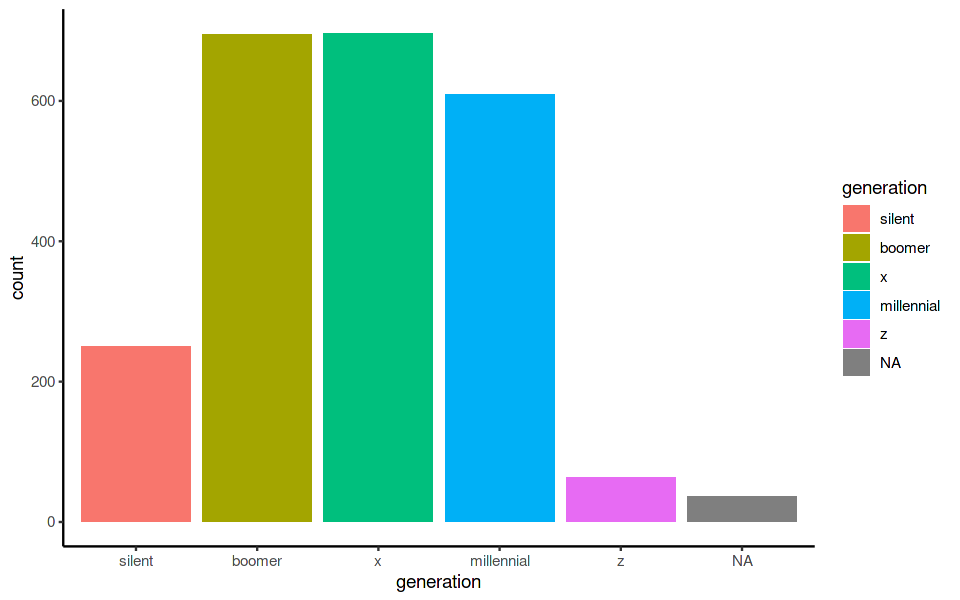

In [ ]:
ggplot(gss18) + geom_bar(aes(x = generation, fill = generation))

## Attitudes about religion
Here is the overall distribution of religious affiliation in the data:

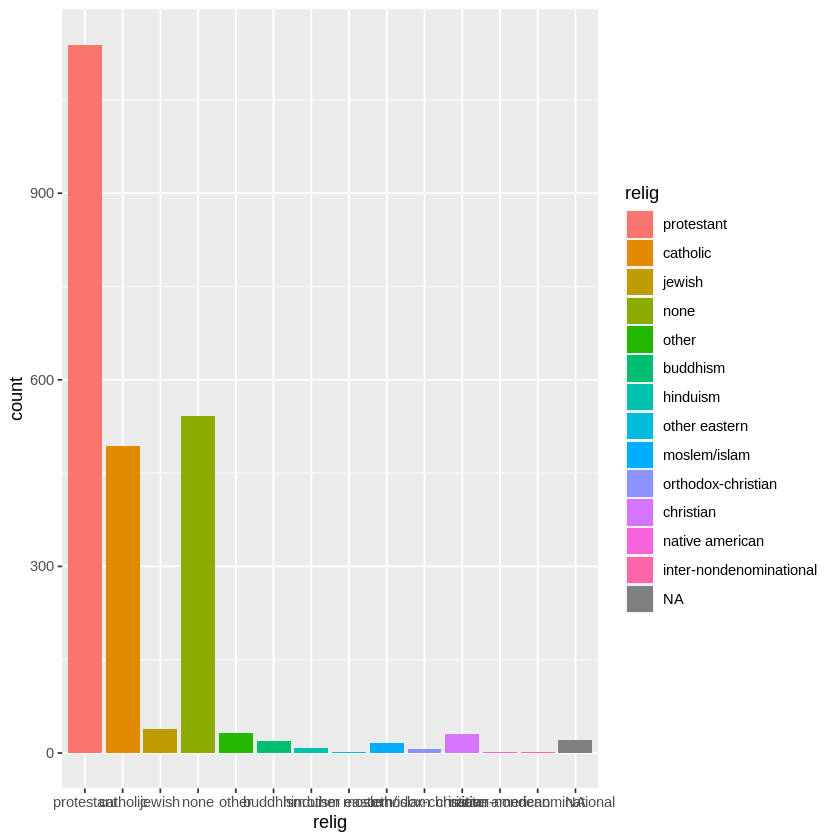

In [116]:
# distribution of religion
gss18 %>% ggplot(aes(x = relig, fill = relig)) +
  geom_bar()

Let's think of ways to improve this jumbled plot. First, we can turn it sideways for better readability:

In [118]:
# distribution of religion 


By default, the order of the labels shown by R corresponds to the order of the factor levels:

In [ ]:
# levels of gss18$relig

[1] "protestant"              "catholic"               
 [3] "jewish"                  "none"                   
 [5] "other"                   "buddhism"               
 [7] "hinduism"                "other eastern"          
 [9] "moslem/islam"            "orthodox-christian"     
[11] "christian"               "native american"        
[13] "inter-nondenominational"

To improve the appearance of the plot, we can use `fct_infreq` to reorder the levels such in increasing order of frequency:

In [ ]:
# sort the levels by their frequency

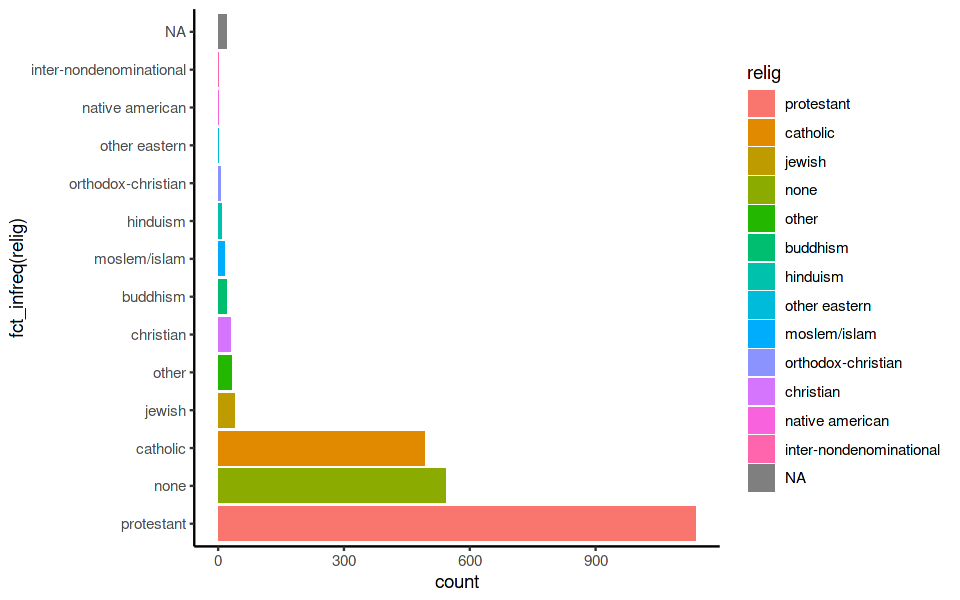

In [ ]:
# plot levels sorted by frequency

We may also want to simplify the plot by grouping some factors together. The `fct_lump` command will combine uncommon factor levels into a new level, "other":

In [ ]:
# lump uncommon factors together

 Factor w/ 4 levels "protestant","catholic",..: 4 2 3 1 2 2 1 2 3 1 ...
 - attr(*, "label")= chr "r's religious preference"


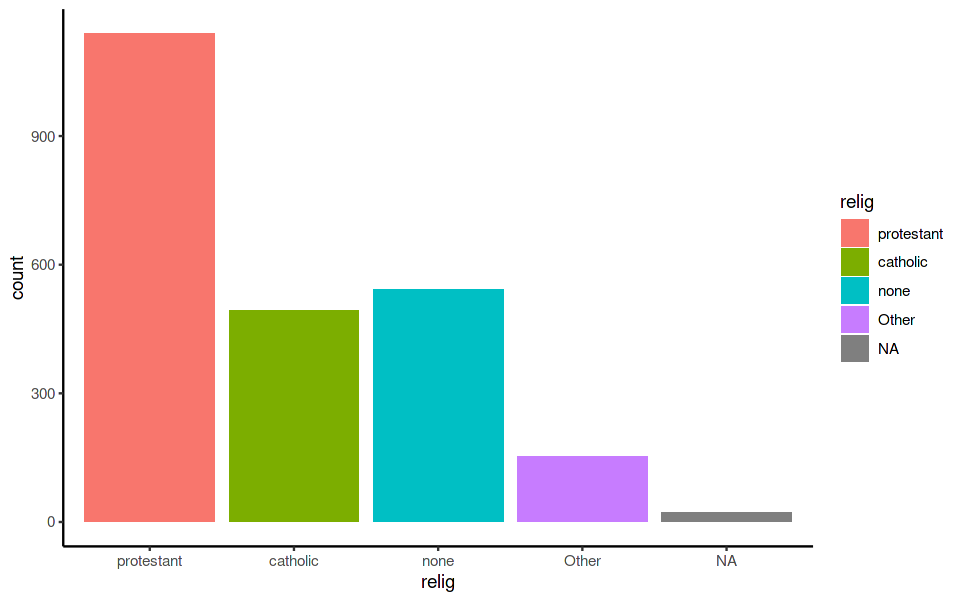

In [ ]:
# religions lumped

Be careful with this. Not everybody enjoys being lumped into the "Other" category. A good compromise in this case could be to use one bar for "Other", but still break everyone out in the legend:

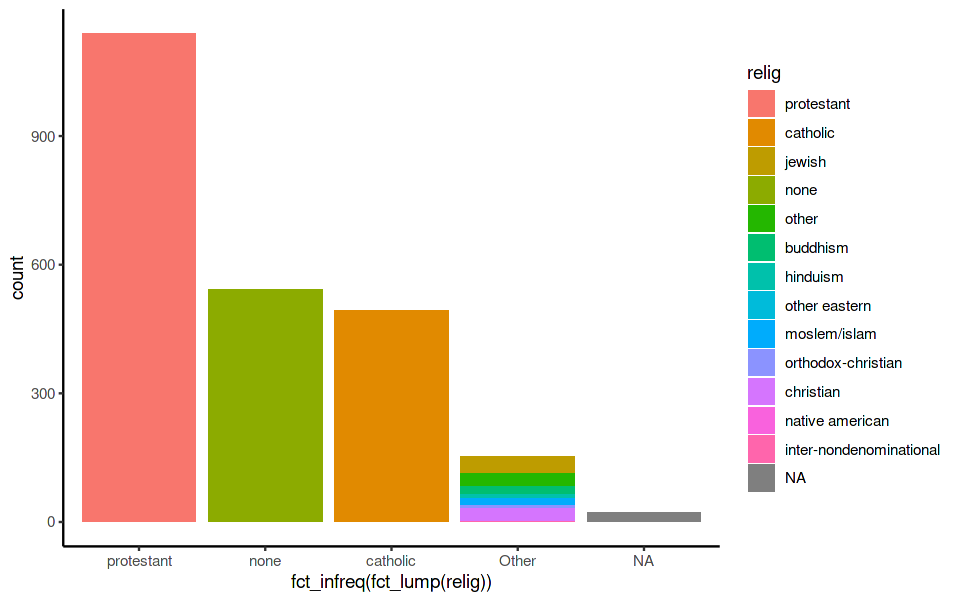

In [ ]:
# lumped levels, by still showing the variation

## Religious affiliation by generation
How does religious affiliation vary from one generation to the next? To study this, we will first use a simple table. The `table` command will take a dataframe containing two categorical columns and create a 2-way table of counts from them:

In [131]:
# religious by generation
gss18 <- gss18 %>% mutate(fct_lump_relig = fct_lump(relig))
gss18 %>% select(relig, fct_lump_relig) %>% print

# A tibble: 2,348 × 2
   relig      fct_lump_relig
   <fct>      <fct>         
 1 christian  Other         
 2 catholic   catholic      
 3 none       none          
 4 protestant protestant    
 5 catholic   catholic      
 6 catholic   catholic      
 7 protestant protestant    
 8 catholic   catholic      
 9 none       none          
10 protestant protestant    
# ℹ 2,338 more rows


In [132]:
gss18 %>% select(generation, fct_lump_relig) %>% table

            fct_lump_relig
generation   protestant catholic none Other
  silent            162       51   26    11
  boomer            371      159  114    42
  x                 332      155  157    45
  millennial        235      101  221    48
  z                  16       20   21     6

We probably want to normalize this table so that the data are expressed as percentages, with the rows summing to one:

In [ ]:
# normalize the table 

            relig
generation   protestant catholic none Other
  silent           0.65     0.20 0.10  0.04
  boomer           0.54     0.23 0.17  0.06
  x                0.48     0.22 0.23  0.07
  millennial       0.39     0.17 0.37  0.08
  z                0.25     0.32 0.33  0.10

Note that by normalizing the rows or columns, we are now studying the conditional distribution of religion given generational status (or vice versa)

In [ ]:
# normalize the row


Next we will do conditional distribution of generation; given a religion


In [13]:
# normalize the column

Next, let's test whether religious affiliation and generational status are statistically independent. To do this, we'll perform a chi-squared test of independence, using `chisq.test()`:

In [ ]:
# chi-squared test of independence

## Hours of TV watched
How does TV watching vary from generation to generation?

Warning message:
“Removed 793 rows containing non-finite values (`stat_boxplot()`).”


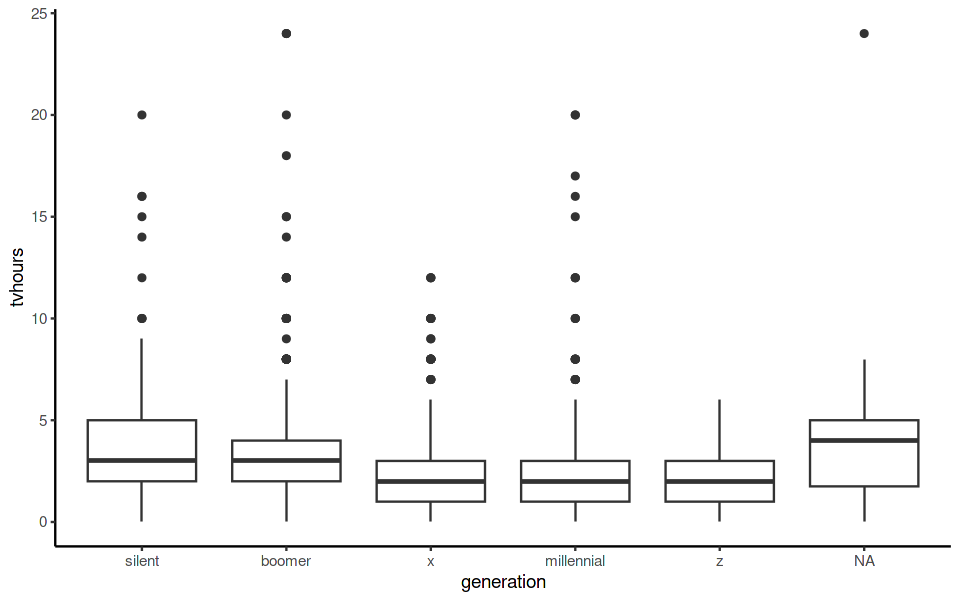

In [ ]:
# hours of TV
gss18 %>% ggplot(aes(x = generation, y = tvhours)) + geom_boxplot()

This plot could maybe be improved by ordering the boxes so that the medians are in ascending order:

In [ ]:
# reorder the factor in ascending order of median
gss18 %>% ggplot(aes(x=fct_reorder(generation, tvhours), y=tvhours)) + geom_boxplot()

## Phone usage
How many people in each generation use a {land line, cell phone}?

In [ ]:
gss18 %>% select(generation, phone) %>% table %>% prop.table(1)

            phone
generation      no phone     refused phone in home phone elsewhere
  silent     0.028000000 0.028000000   0.676000000     0.016000000
  boomer     0.004322767 0.050432277   0.423631124     0.024495677
  x          0.004310345 0.041666667   0.231321839     0.014367816
  millennial 0.003284072 0.016420361   0.090311987     0.003284072
  z          0.000000000 0.047619048   0.174603175     0.031746032
            phone
generation   phone,dk where   cellphone
  silent        0.000000000 0.252000000
  boomer        0.000000000 0.497118156
  x             0.000000000 0.708333333
  millennial    0.000000000 0.886699507
  z             0.000000000 0.746031746

## Political orientation

In [ ]:
select(gss18, generation, partyid) %>% table %>% prop.table(1)

            partyid
generation   strong democrat not str democrat ind,near dem independent
  silent          0.21285141       0.10843373   0.14056225  0.12449799
  boomer          0.19202363       0.14327917   0.11225997  0.12703102
  x               0.16204380       0.15474453   0.14160584  0.17518248
  millennial      0.11570248       0.17024793   0.15206612  0.25950413
  z               0.07936508       0.22222222   0.07936508  0.20634921
            partyid
generation   ind,near rep not str republican strong republican other party
  silent       0.09638554         0.10843373        0.18875502  0.02008032
  boomer       0.11078287         0.12407681        0.16100443  0.02954210
  x            0.10656934         0.13430657        0.09635036  0.02919708
  millennial   0.12231405         0.09256198        0.04297521  0.04462810
  z            0.15873016         0.14285714        0.06349206  0.04761905

We can visualize these proportions, but it gets a bit messy because of all the levels.

### Recoding factors
Sometimes we want to recode factors to make their labels more interpretable/plottable/whatever. We can use `fct_recode` to this. The syntax is

    fct_recode(<factor>, "new_level1" = "old level1", "new level2" = "old level2", ...)
    
A useful feature of `fct_recode` is for combining multiple factors into one:

In [ ]:
# lump everyone into Democrat, Independent, Republican, or Other

gss18 %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "strong republican",
    "Republican, weak"      = "not str republican",
    "Independent, near republican" = "ind,near rep",
    "Independent, near democrat" = "ind,near dem",
    "Democrat, weak"        = "not str democrat",
    "Democrat, strong"      = "strong democrat"
  ))

            partyid
generation     Democrat Independent Republican      Other
  silent     0.32128514  0.36144578 0.29718876 0.02008032
  boomer     0.33530281  0.35007386 0.28508124 0.02954210
  x          0.31678832  0.42335766 0.23065693 0.02919708
  millennial 0.28595041  0.53388430 0.13553719 0.04462810
  z          0.30158730  0.44444444 0.20634921 0.04761905

If there are many levels this gets repetitious, so we have an additional command called `fct_collapse` which is specifically designed to handle this case:

In [ ]:
gss18 %>%
  mutate(partyid = fct_collapse(partyid,
    Other = c("no answer", "don't know", "other party"),
    Republican = c("strong republican", "not str republican"),
    Independent = c("ind,near rep", "independent", "ind,near dem"),
    Democrat = c("not str democrat", "strong democrat")
  )) %>%
  count(partyid)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `partyid = fct_collapse(...)`.
Caused by warning:
! Unknown levels in `f`: no answer, don't know”


partyid,n
<fct>,<int>
Democrat,731
Independent,980
Republican,527
Other,77
NA,33
